In [1]:
pip install phik

Note: you may need to restart the kernel to use updated packages.


# Банки — Анализ оттока клиентов

## Материалы

Презентация https://drive.google.com/file/d/1GPaXPrBFDcjrE_5CKcDFzZ9bAbuxVElJ/view?usp=sharing

## Описание проекта

**«Метанпромбанк» — деньги не пахнут!**

🏦 Наш проект связан с анализом оттока клиентов: банковские маркетологи ещё на заре времён выяснили, что удерживать старых клиентов дешевле, чем привлекать новых, а моя задача  - помочь им в этом, чтобы «Метанпромбанк» рос, крепчал и развивался.

Наш банк в срочном порядке ищет аналитиков уверенным владением Python. Моя главная задача - анализ оттока клиентов. Анализ покажет, какие клиенты уходят из банка, а так же поможет мне составить сегменты клиентов, которые склонны уходить из банка.

## Загрузка и описание данных

In [2]:
# импорт библиотек
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from phik import phik_matrix
import warnings
warnings.filterwarnings("ignore")

In [3]:
# настройка отображения экспоненциальных значений
pd.set_option('display.float_format', '{:.2f}'.format)

In [4]:
# чтение данных
data = pd.read_csv('/datasets/bank_scrooge.csv')
data

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.00,Рыбинск,Ж,25.00,1,59214.82,2,0,1,75719.14,1
1,146556,861.00,Рыбинск,Ж,37.00,5,850594.33,3,1,0,86621.77,0
2,120722,892.00,Рыбинск,Ж,30.00,0,NaN,1,1,1,107683.34,0
3,225363,866.00,Ярославль,Ж,51.00,5,1524746.26,2,0,1,174423.53,1
4,157978,730.00,Ярославль,М,34.00,5,174.00,1,1,0,67353.16,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814.00,Рыбинск,М,27.00,1,78144.65,1,0,1,18943.64,0
9996,139170,894.00,Ярославль,М,46.00,0,NaN,1,1,0,196898.29,0
9997,115639,903.00,Ярославль,М,24.00,0,NaN,2,1,1,108905.09,0
9998,148700,777.00,Ярославль,Ж,68.00,3,865457.97,3,0,1,86874.90,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


In [6]:
# для удобства привожу названия столбцов к нижнему регистру
data.columns = data.columns.str.lower()

In [7]:
# удаляю строки с нулевым значением в столбце products, тк у клиента должен быть хоть один продукт
data = data[data['products'] != 0]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9999 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   userid         9999 non-null   int64  
 1   score          9999 non-null   float64
 2   city           9999 non-null   object 
 3   gender         9999 non-null   object 
 4   age            9973 non-null   float64
 5   equity         9999 non-null   int64  
 6   balance        7705 non-null   float64
 7   products       9999 non-null   int64  
 8   credit_card    9999 non-null   int64  
 9   last_activity  9999 non-null   int64  
 10  est_salary     9999 non-null   float64
 11  churn          9999 non-null   int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 1015.5+ KB


In [8]:
data.describe()

,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,9999.00,9999.00,9973.00,9999.00,7705.00,9999.00,9999.00,9999.00,9999.00,9999.00
mean,171817.11,848.69,42.73,2.63,827794.31,1.87,0.68,0.52,147879.17,0.18
std,33709.07,65.44,12.18,1.98,1980614.15,0.79,0.47,0.50,139390.07,0.39
min,94561.00,642.00,18.00,0.00,0.00,1.00,0.00,0.00,2546.30,0.00
25%,142809.50,802.00,33.00,0.00,295554.16,1.00,0.00,0.00,75252.12,0.00
50%,172740.00,853.00,40.00,3.00,524272.20,2.00,1.00,1.00,119661.51,0.00
75%,201262.50,900.00,51.00,4.00,980705.85,2.00,1.00,1.00,174501.12,0.00
max,229145.00,1000.00,86.00,9.00,119113552.01,5.00,1.00,1.00,1395064.45,1.00


При загрузке данных выполнил следующее:
- привел названия столбцов к нижнему регистру;
- удалил данные о клиентах без продуктов банка;
- данные имеют выбросы по столбцам `balance` и `est_salary` обработаю их при анализе этих параметоров.

## Подготовка данных

### Проверка на дубликаты

#### Полные дубликаты

In [9]:
# проверяю на дубликаты
duplicated_data = data[data.duplicated()]
len(duplicated_data)

0

Полных дубликатов в представленных данных нет

#### Неявные дубликаты

In [10]:
# неявные дубликаты по столбцу userid
duplicated_userid = data[data.duplicated(subset='userid')]
len(duplicated_userid)

73

73 дубликата по столбцу userid, удалить их все нельзя.

Предлагаю среди них найти тех клиентов у которых кроме `userid` дублируются столбцы `city`, `age` и `gender`

In [11]:
duplicated_userid_city_age_gender = data[data.duplicated(subset=['userid', 'city', 'age', 'gender'])]
len(duplicated_userid_city_age_gender)

0

In [12]:
duplicated_userid_age_gender = data[data.duplicated(subset=['userid', 'age', 'gender'], keep=False)]
duplicated_userid_age_gender.sort_values(by='userid')

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
3274,155765,863.00,Ярославль,М,30.00,5,1036114.50,5,1,1,150744.50,1
5197,155765,923.00,Рыбинск,М,30.00,0,NaN,1,1,1,120296.60,0
8205,227795,840.00,Рыбинск,М,34.00,2,350768.03,1,1,0,102036.14,1
8497,227795,839.00,Ярославль,М,34.00,2,326593.14,2,1,0,103314.92,0


In [13]:
duplicated_userid_gender = data[data.duplicated(subset=['userid', 'gender'], keep=False)]
duplicated_userid_gender.sort_values(by='userid')

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
7694,116540,887.00,Ярославль,Ж,38.00,0,NaN,1,0,1,119247.61,0
1893,116540,883.00,Рыбинск,Ж,55.00,1,362756.49,3,0,1,175920.48,1
7542,117943,880.00,Ярославль,Ж,40.00,0,NaN,1,1,0,137718.93,0
4866,117943,855.00,Рыбинск,Ж,32.00,6,1036832.93,4,1,1,107792.71,1
9775,124450,758.00,Рыбинск,Ж,36.00,0,73574.07,2,0,1,79963.59,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6412,226550,939.00,Ярославль,М,34.00,0,NaN,1,1,1,145913.73,0
8497,227795,839.00,Ярославль,М,34.00,2,326593.14,2,1,0,103314.92,0
8205,227795,840.00,Рыбинск,М,34.00,2,350768.03,1,1,0,102036.14,1
1247,228075,932.00,Ярославль,М,NaN,5,7601719.20,2,1,1,408121.16,0


In [14]:
# проверяю дубликаты по пропускам
duplicated_userid_balance = duplicated_userid[duplicated_userid['balance'].isna()]
duplicated_userid_balance_age = duplicated_userid_balance[duplicated_userid_balance['age'].isna()]
duplicated_userid_balance_age.sort_values(by='userid')

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
8785,127440,663.00,Ярославль,М,NaN,0,NaN,1,1,1,117197.56,0
9457,141945,929.00,Ярославль,М,NaN,0,NaN,1,1,0,381868.89,0
5495,151662,884.00,Рыбинск,Ж,NaN,0,NaN,1,1,1,137500.77,0
9632,185829,927.00,Ярославль,М,NaN,0,NaN,1,1,0,231254.86,0
9380,187459,894.00,Рыбинск,М,NaN,0,NaN,1,1,0,178012.28,0
2165,187635,692.00,Рыбинск,Ж,NaN,0,NaN,1,1,1,160368.82,0
8015,198635,670.00,Ярославль,Ж,NaN,0,NaN,1,1,1,168699.33,0
9301,202983,942.00,Рыбинск,Ж,NaN,0,NaN,1,1,1,163804.73,0
8385,206759,915.00,Рыбинск,М,NaN,0,NaN,1,1,0,71179.53,0
8449,210898,805.00,Ярославль,Ж,NaN,0,NaN,1,0,1,922080.25,0


У дубликатов по `userid` с пропусками в столбцах `balance` и `age` есть данные об активности и заработной плате

In [15]:
# проверяю дубликаты по userid и est_salary
duplicated_userid_salary = data[data.duplicated(subset=['userid', 'est_salary'], keep=False)]
duplicated_userid_salary.sort_values(by='userid')

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
4343,141945,929.00,Рыбинск,М,33.00,0,NaN,1,1,0,381868.89,0
9457,141945,929.00,Ярославль,М,NaN,0,NaN,1,1,0,381868.89,0


In [16]:
# проверяю дубликаты по userid и score
duplicated_userid_score = data[data.duplicated(subset=['userid', 'score'], keep=False)]
duplicated_userid_score.sort_values(by='userid')

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
4343,141945,929.00,Рыбинск,М,33.00,0,NaN,1,1,0,381868.89,0
9457,141945,929.00,Ярославль,М,NaN,0,NaN,1,1,0,381868.89,0
9322,221809,917.00,Рыбинск,М,45.00,0,NaN,1,1,1,199728.29,0
9634,221809,917.00,Ярославль,М,NaN,0,NaN,1,1,1,192644.15,0
6446,222480,776.00,Ярославль,Ж,38.00,5,823145.83,2,1,1,55777.44,0
9104,222480,776.00,Рыбинск,Ж,NaN,5,796735.09,1,1,1,55073.63,0


In [17]:
data_clean = data[data.duplicated(subset=['userid', 'score'])]
data = data.drop(data_clean.index)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9996 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   userid         9996 non-null   int64  
 1   score          9996 non-null   float64
 2   city           9996 non-null   object 
 3   gender         9996 non-null   object 
 4   age            9973 non-null   float64
 5   equity         9996 non-null   int64  
 6   balance        7704 non-null   float64
 7   products       9996 non-null   int64  
 8   credit_card    9996 non-null   int64  
 9   last_activity  9996 non-null   int64  
 10  est_salary     9996 non-null   float64
 11  churn          9996 non-null   int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 1015.2+ KB


### Проверка на пропуски

In [18]:
# создаю столбцы с индикатором, есть пропуск или нет в столбцах age и balance
data['age_missing'] = data['age'].isna().astype(int)
data['balance_missing'] = data['balance'].isna().astype(int)
data

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,age_missing,balance_missing
0,183012,850.00,Рыбинск,Ж,25.00,1,59214.82,2,0,1,75719.14,1,0,0
1,146556,861.00,Рыбинск,Ж,37.00,5,850594.33,3,1,0,86621.77,0,0,0
2,120722,892.00,Рыбинск,Ж,30.00,0,NaN,1,1,1,107683.34,0,0,1
3,225363,866.00,Ярославль,Ж,51.00,5,1524746.26,2,0,1,174423.53,1,0,0
4,157978,730.00,Ярославль,М,34.00,5,174.00,1,1,0,67353.16,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814.00,Рыбинск,М,27.00,1,78144.65,1,0,1,18943.64,0,0,0
9996,139170,894.00,Ярославль,М,46.00,0,NaN,1,1,0,196898.29,0,0,1
9997,115639,903.00,Ярославль,М,24.00,0,NaN,2,1,1,108905.09,0,0,1
9998,148700,777.00,Ярославль,Ж,68.00,3,865457.97,3,0,1,86874.90,0,0,0


In [19]:
data_age = data.groupby('age_missing').agg({
    'est_salary': ['mean'],
    'age': ['mean'],
    'products': ['median'],
    'equity': ['median'],
    'city': lambda x: x.mode(),
    'gender': lambda x: x.mode()
}).reset_index()

In [20]:
data_age.T

,,0,1
age_missing,,0,1
est_salary,mean,147799.12,174505.59
age,mean,42.73,NaN
products,median,2,1
equity,median,3,0
city,<lambda>,Ярославль,"[Рыбинск, Ярославль]"
gender,<lambda>,М,М


In [21]:
correlation_matrix = data.corr()
correlation_matrix['age_missing']

userid             0.03
score              0.00
age                 NaN
equity            -0.03
balance            0.01
products          -0.03
credit_card        0.01
last_activity      0.02
est_salary         0.01
churn             -0.02
age_missing        1.00
balance_missing    0.04
Name: age_missing, dtype: float64

У всех показателей не наблюдается корреляции. 

Это говорит о том, что пропуски в столбце age относятся к классу `MCAR` (отсутствуют совершенно случайно). 

In [23]:
data_balance = data.groupby('balance_missing').agg({
    'est_salary': ['mean'],
    'age': ['mean'],
    'products': ['median'],
    'equity': ['median'],
    'city': lambda x: x.mode(),
    'gender': lambda x: x.mode()
}).reset_index()

In [24]:
data_balance.T

,,0,1
balance_missing,,0,1
est_salary,mean,124510.88,226344.83
age,mean,42.92,42.08
products,median,2,1
equity,median,4,0
city,<lambda>,Ярославль,Ярославль
gender,<lambda>,Ж,М


In [25]:
correlation_matrix['balance_missing']

userid             0.00
score              0.14
age               -0.03
equity            -0.71
balance             NaN
products          -0.49
credit_card        0.16
last_activity      0.03
est_salary         0.31
churn             -0.25
age_missing        0.04
balance_missing    1.00
Name: balance_missing, dtype: float64

У следующих показателей наблюдается корреляция:
- `equity`отрицательная высокая;
- `products` отрицательная слабая;
- `est_salary` положительная слабая;
- `churn` отрицательная очень слабая;
- `score` положительная очень слабая;
- `credit_card` положительная очень слабая;

у показателей `userid`, `age` и `last_activity` корреляция отсутствует. 

Это говорит о том, что пропуски в столбце `balance` относятся к классу `MNAR` (отсутствуют не случайно).

Заполнение пропусков медианным значением, сгруппировав по количеству баллов собственности, приведёт к заметным искажениям.

## Исследовательский анализ данных

### Распределение ухода клиентов от возраста

In [26]:
age_bins = data['age'].max() - data['age'].min()
age_bins

68.0

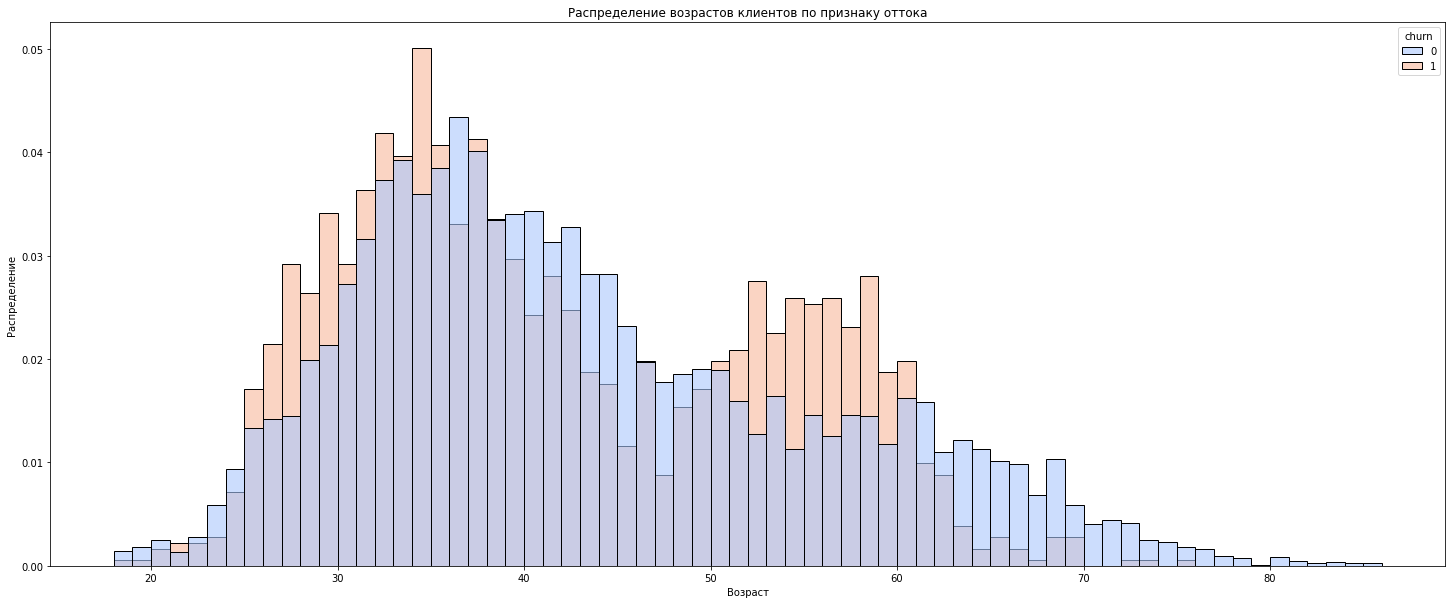

In [27]:
plt.figure(figsize=(25, 10))
sns.histplot(data=data, x='age', hue='churn', stat='density', common_norm=False, 
             bins=68, kde=False, palette='coolwarm', alpha=0.6)

#plt.xticks(data['age'], rotation=90) 
plt.title('Распределение возрастов клиентов по признаку оттока')
plt.xlabel('Возраст')
plt.ylabel('Распределение')
plt.show()

Интервалы возрастов в которых клиенты чаще уходят:
- 25-35 лет;
- 37 лет;
- 50-60 лет.

### Распределение ухода клиентов от кредитного рейтинга

In [28]:
score_bins = data['score'].max() - data['score'].min()
score_bins

358.0

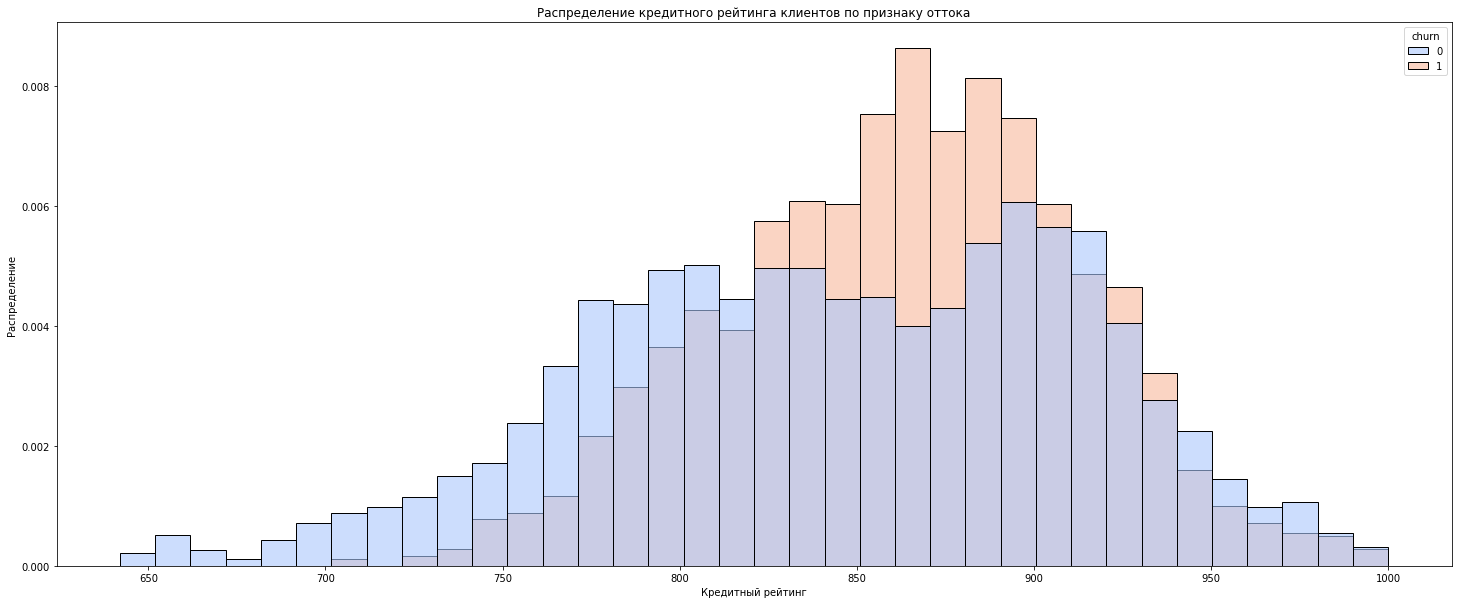

In [29]:
plt.figure(figsize=(25, 10))
sns.histplot(data=data, x='score', hue='churn', stat='density', common_norm=False, 
             bins=36, kde=False, palette='coolwarm', alpha=0.6)

plt.title('Распределение кредитного рейтинга клиентов по признаку оттока')
plt.xlabel('Кредитный рейтинг')
plt.ylabel('Распределение')
plt.show()

Интервалы кредитного рейтинга в которых клиенты чаще уходят:
- 830 - 910 баллов;
- 930 - 940 баллов.

### Распределение ухода клиентов от баланса

In [30]:
balance_bins = data['balance'].max() - data['balance'].min()
balance_bins

119113552.01

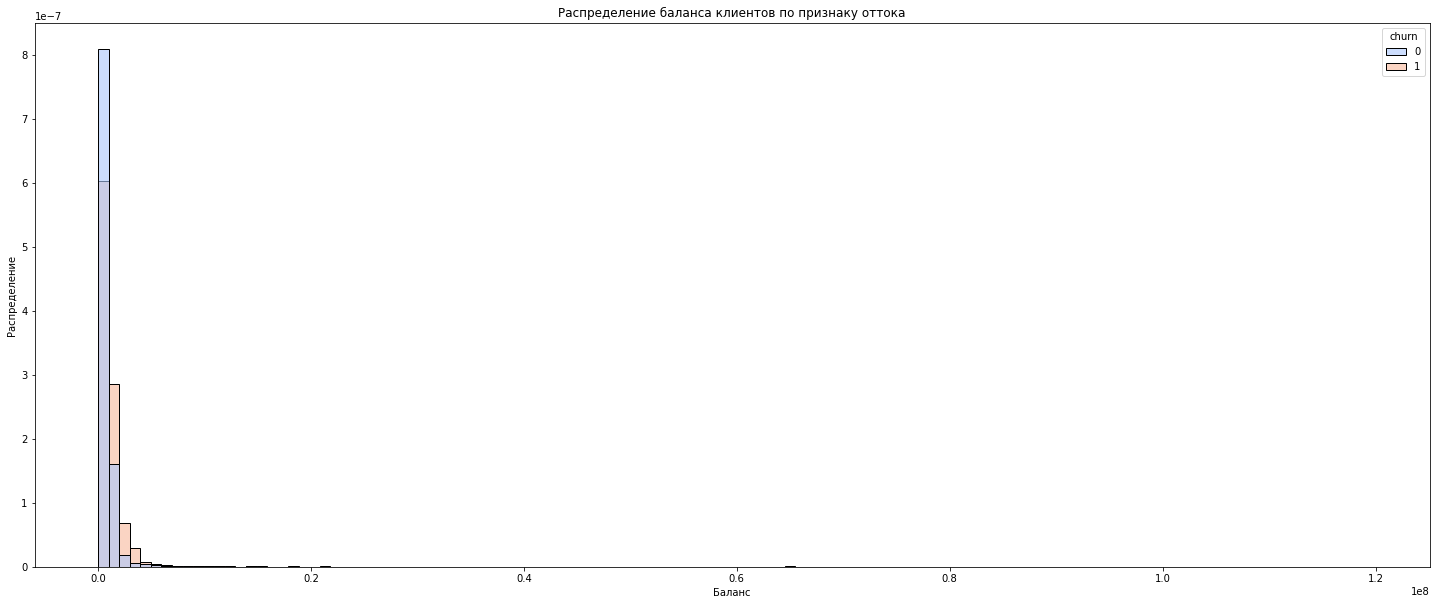

In [31]:
plt.figure(figsize=(25, 10))
sns.histplot(data=data, x='balance', hue='churn', stat='density', common_norm=False, 
             bins=120, kde=False, palette='coolwarm', alpha=0.6)

plt.title('Распределение баланса клиентов по признаку оттока')
plt.xlabel('Баланс')
plt.ylabel('Распределение')
plt.show()

В данных о балансе большие выбросы, которые мешают оценить отток клиентов, уберу выбросы и построю новое распределение

In [32]:
data['balance'].describe()

count        7704.00
mean       827798.34
std       1980742.67
min             0.00
25%        295526.57
50%        524225.14
75%        980753.67
max     119113552.01
Name: balance, dtype: float64

In [33]:
data_balance_clean = data[data['balance'] <= 980753.67]

In [34]:
balance_ratio = data_balance_clean['balance'].count() / data['balance'].count()
balance_ratio

0.75

В датафрейме без выбросов осталось 75% данных на уровне третьего квартиля, потерял четверть данных, сделаю расчет по верхнюю границу

In [35]:
Q1 = data['balance'].quantile(0.25)
Q3 = data['balance'].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR
upper_bound

2008594.3162499997

Ограничу данные 2 009 000 тр

In [36]:
data_balance_clean = data[data['balance'] <= 2009000]

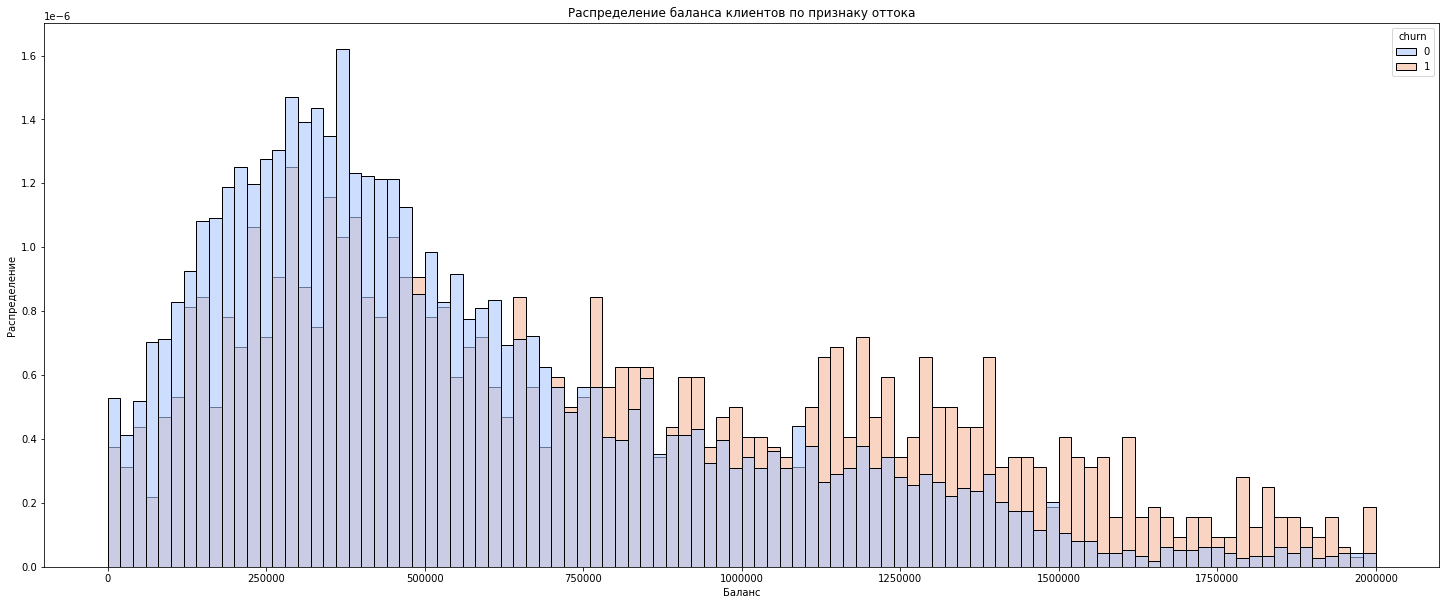

In [37]:
plt.figure(figsize=(25, 10))
sns.histplot(data=data_balance_clean, x='balance', hue='churn', stat='density', common_norm=False, 
             bins=100, kde=False, palette='coolwarm', alpha=0.6)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Распределение баланса клиентов по признаку оттока')
plt.xlabel('Баланс')
plt.ylabel('Распределение')
plt.show()

Интервалы значений баланса в которых клиенты чаще уходят:
- 760000 - 2000000 тр.

### Распределение ухода клиентов от зарплаты

In [38]:
est_salary_bins = data['est_salary'].max() - data['est_salary'].min()
est_salary_bins

1392518.15

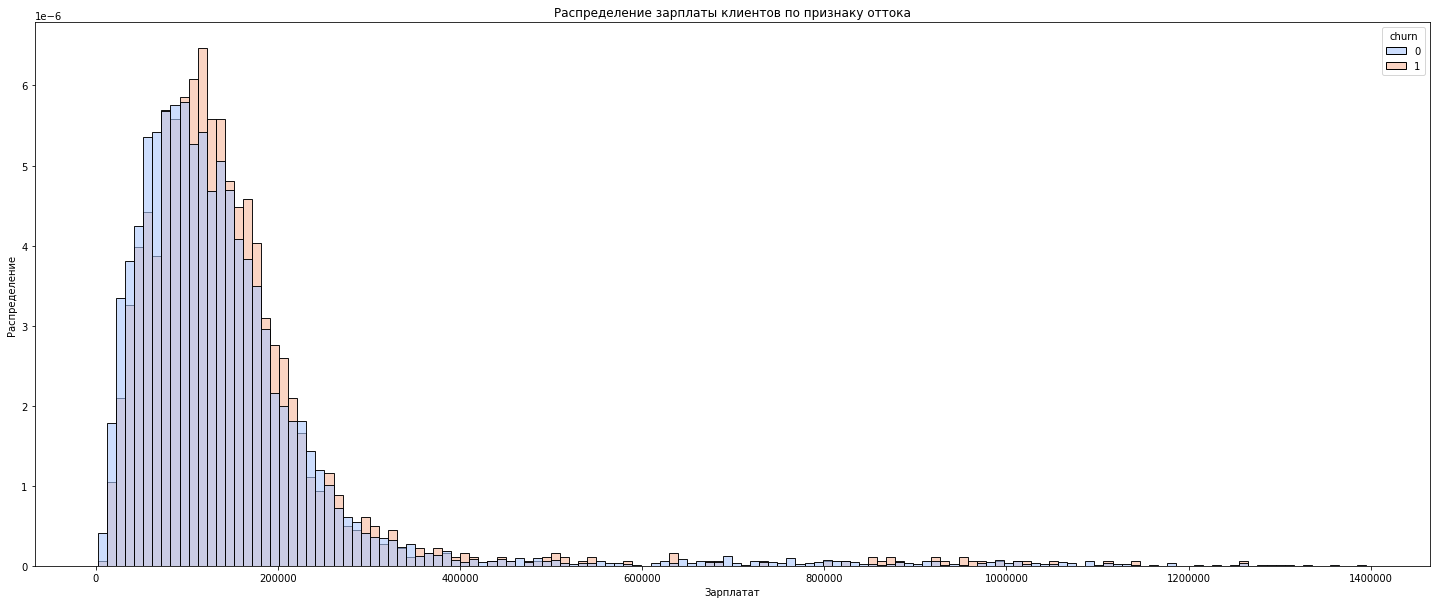

In [39]:
plt.figure(figsize=(25, 10))
sns.histplot(data=data, x='est_salary', hue='churn', stat='density', common_norm=False, 
             bins=140, kde=False, palette='coolwarm', alpha=0.6)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Распределение зарплаты клиентов по признаку оттока')
plt.xlabel('Зарплатат')
plt.ylabel('Распределение')
plt.show()

In [40]:
data['est_salary'].describe()

count      9996.00
mean     147860.56
std      139387.53
min        2546.30
25%       75252.18
50%      119658.10
75%      174499.52
max     1395064.45
Name: est_salary, dtype: float64

In [41]:
data_salary_clean = data[data['est_salary'] <= 155061.52]

In [42]:
Q1_salary = data['est_salary'].quantile(0.25)
Q3_salary = data['est_salary'].quantile(0.75)
IQR_salary = Q3_salary - Q1_salary

upper_bound_salary = Q3_salary + 1.5 * IQR_salary
upper_bound_salary

323370.52749999997

In [43]:
data_salary_clean = data[data['est_salary'] <= 323400]

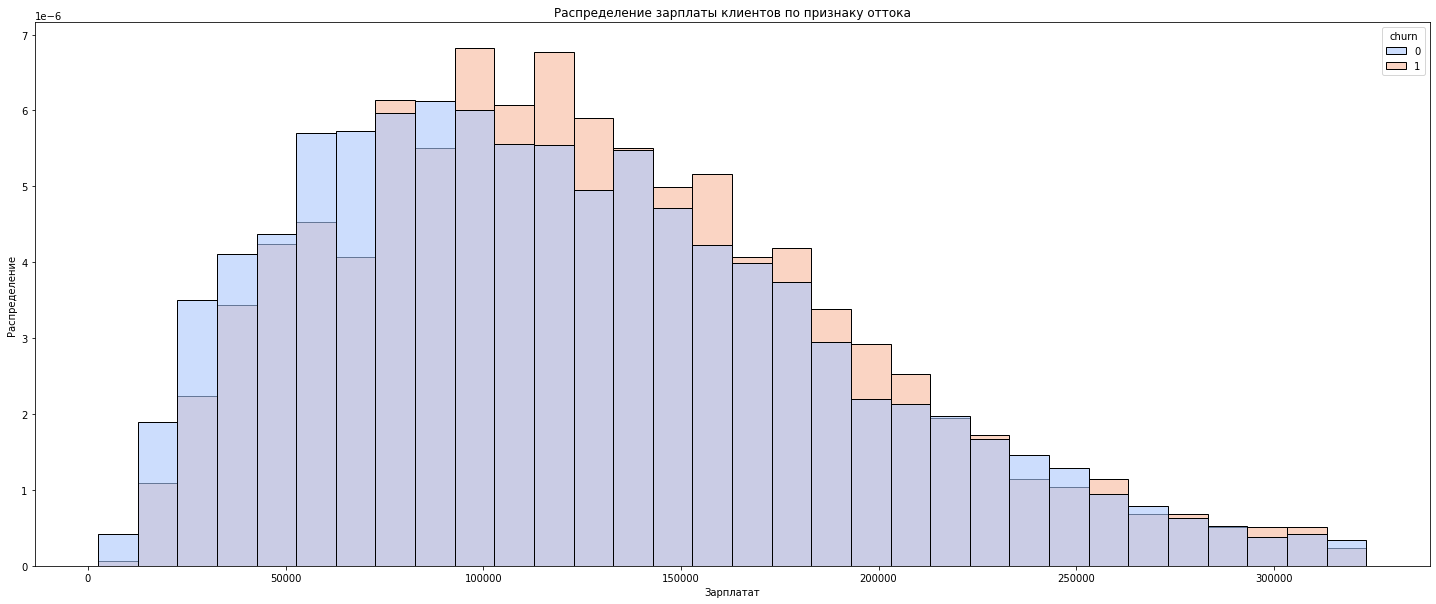

In [44]:
plt.figure(figsize=(25, 10))
sns.histplot(data=data_salary_clean, x='est_salary', hue='churn', stat='density', common_norm=False, 
             bins=32, kde=False, palette='coolwarm', alpha=0.6)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Распределение зарплаты клиентов по признаку оттока')
plt.xlabel('Зарплатат')
plt.ylabel('Распределение')
plt.show()

Интервалы значений зарплаты в которых клиенты чаще уходят:
- от 100000 тр.

### Распределение ухода клиентов от дискретных величин

In [45]:
def plot_churn_by_category(data, category_col):
    
    plt.figure(figsize=(12, 6))
    
    
    sns.barplot(data=data, x=category_col, y='churn', estimator=lambda x: sum(x) / len(x), ci=None, palette='coolwarm')

    mean_churn = data['churn'].mean()
    plt.axhline(mean_churn, color='red', linestyle='--', label='Средний уровень оттока')

    plt.title(f'Зависимость оттока клиентов от {category_col}')
    plt.xlabel(category_col)
    plt.ylabel('Уровень оттока')
    plt.legend()
    plt.show()

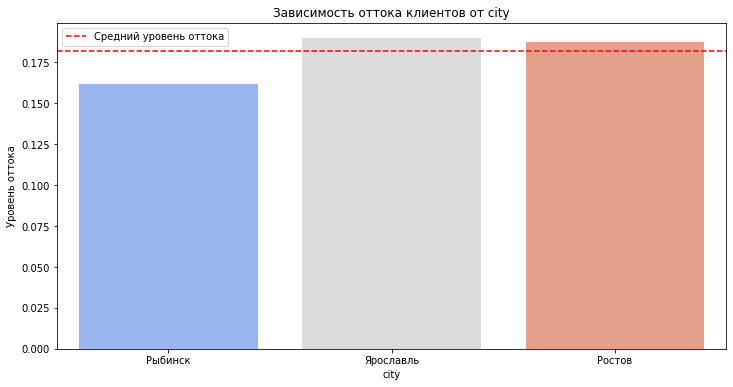

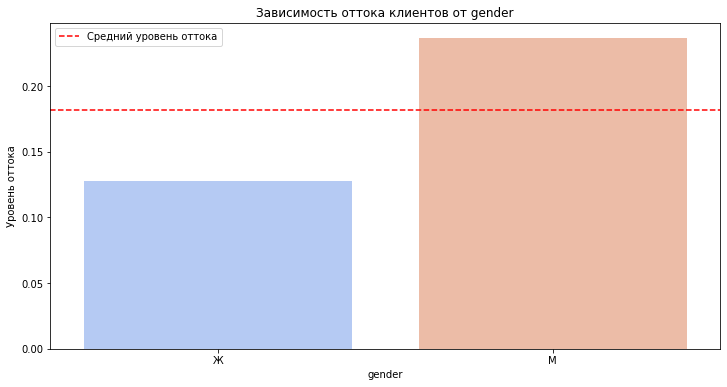

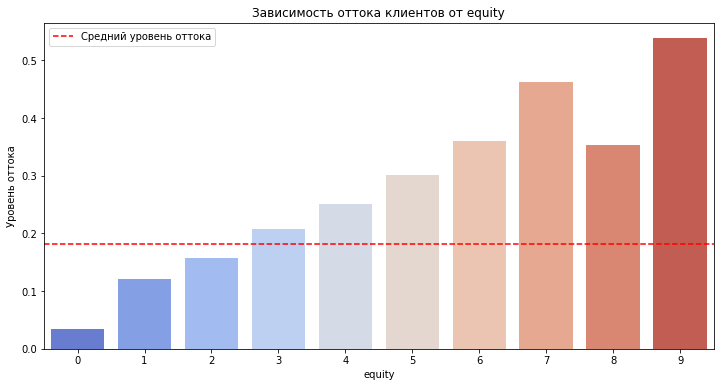

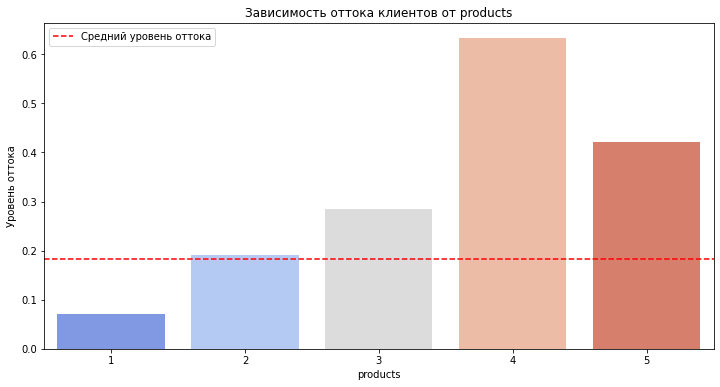

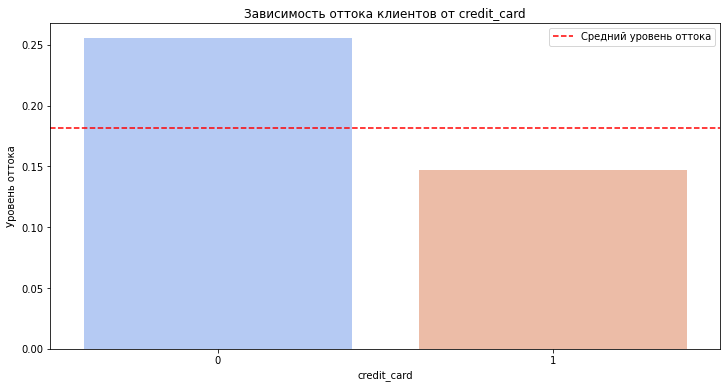

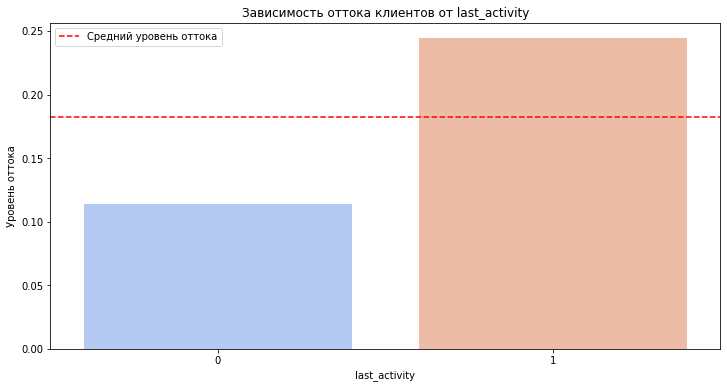

In [46]:
categorical_columns = ['city', 'gender', 'equity', 'products', 'credit_card', 'last_activity']

for column in categorical_columns:
    plot_churn_by_category(data, column)

Чаще отказываются от услуг банка клиенты:
- из Ярославля и Ростова;
- мужчины;
- владельцы от 3 до 9 объектов недвижимости;
- пользователи от 2 до 5 продуктов;
- без кредитной карты;
- имевшие активность в последнее время.

### Корреляцилнный анализ

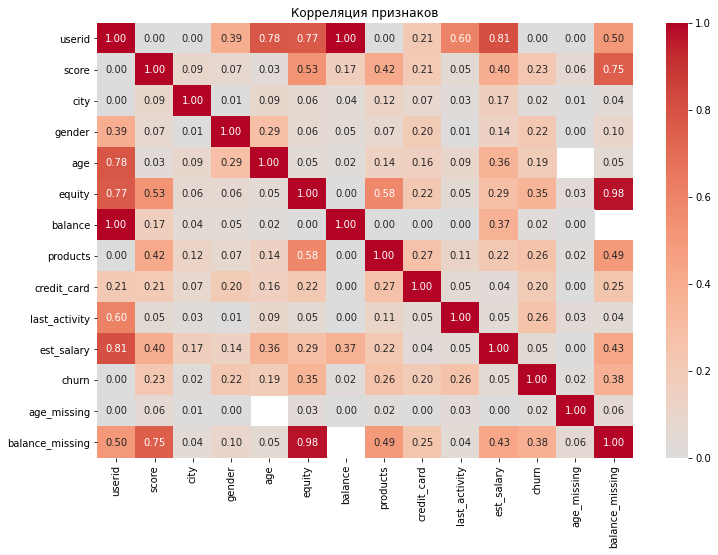

Корреляция признаков с признаком оттока (churn):


churn             1.00
balance_missing   0.38
equity            0.35
last_activity     0.26
products          0.26
score             0.23
gender            0.22
credit_card       0.20
age               0.19
est_salary        0.05
balance           0.02
city              0.02
age_missing       0.02
userid            0.00
Name: churn, dtype: float64

In [47]:
interval_cols = ['age', 'balance', 'est_salary', 'score']

correlation_matrix = phik_matrix(data, interval_cols=interval_cols)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0, annot=True, fmt='.2f')
plt.title('Корреляция признаков')
plt.show()

churn_correlation = correlation_matrix['churn'].sort_values(ascending=False)
print("Корреляция признаков с признаком оттока (churn):")
churn_correlation

Корреляция с оттоком `churn`:
- `score`: Корреляция = 0.26 — это очень слабая корреляция. У клиентов с более высоким оценочным баллом вероятность оттока незначительно выше;
- `last_activity`: Корреляция = 0.26 — очень слабая корреляция, активность клиентов также слабо связана с их вероятностью оттока;
- `gender`: Корреляция = 0.22 — также очень слабая корреляция. Гендер практически не влияет на отток клиентов;
- `age`: Корреляция = 0.19 — это также очень слабая корреляция, то есть возраст слабо связан с оттоком;
- `products`: Корреляция = 0.26 — очень слабая корреляция, что может указывать на небольшое влияние количества используемых продуктов на вероятность ухода клиентов;
- `credit card`: Корреляция = 0.20 — очень слабая корреляция, что означает слабое влияние наличия кредитной карты на отток;
- `est_salary`: Корреляция = 0.02 — это практически отсутствие корреляции, то есть уровень зарплаты клиентов практически не влияет на их отток;

Взаимосвязь других признаков:
- `equity` и `balance_missing`: Корреляция = 0.98 — очень высокая корреляция. Это говорит о том, чтоу клиентов с большим количеством баллов недвижимости практически всегда отсутствуют данные о балансе;
- `equity` и `products`, `score`: 0,53/0,58 средняя корреляция, чем больше недвижимости, тем больше продуктов и кредитный рейтинг;
- `est_salary` и `score`, `balance`, `age`: 0,40/0,36/0,37 говорит о том, чточем выше зарплата, тем выше кредитный рейтинг, баланс на счете и возраст, что вполне логично;
- `userid` и `age`, `equity`, `balance`, `est_salary`: Высокие корреляции, но они не имеют смысла тк userid это уникальный номер клиента. Если он присваивается последовательно, то можно сделать предположение, что клиенты имеющие более высокий номер клиента (те пришедшие позже) имеют более высокую зарплату, баланс, возрас и количество недвижимости, это может говорить о результатах маркетинговых кампаний, но в данной работе мы их не рассматриваем. Но вероятнее всего уникальный номер клиента устанавливается в зависимости от города и филиала.

## Проверка статистических гипотез

### Различия дохода между теми клиентами, которые ушли и теми, которые остались

**Нулевая гипотеза (H0)**: Средний доход клиентов, которые ушли, равен среднему доходу клиентов, которые остались.

**Альтернативная гипотеза (H1)**: Средний доход клиентов, которые ушли, не равен среднему доходу клиентов, которые остались.

In [48]:
# провожу тест Шапиро чтобы проверить нормальность распределения
group_churned_salary = data[data['churn'] == 1]['est_salary']
group_retained_salary = data[data['churn'] == 0]['est_salary']

shapiro_churned = stats.shapiro(group_churned_salary)
shapiro_retained = stats.shapiro(group_retained_salary)

print("Тест Шапиро-Уилка для ушедших клиентов:", shapiro_churned)
print("Тест Шапиро-Уилка для оставшихся клиентов:", shapiro_retained)

Тест Шапиро-Уилка для ушедших клиентов: ShapiroResult(statistic=0.6440083980560303, pvalue=0.0)
Тест Шапиро-Уилка для оставшихся клиентов: ShapiroResult(statistic=0.61471027135849, pvalue=0.0)


p-value равен нулю это говорит о том, что распределение данных о доходах значительно отличается от нормального, следовательно, нужно использовать тест Манна-Уитни

In [49]:
mann_whitney_result = stats.mannwhitneyu(group_churned_salary, group_retained_salary)

print("Результат теста Манна-Уитни:")
print("Статистика:", mann_whitney_result.statistic)
print("p-value:", mann_whitney_result.pvalue)

alpha = 0.05
if mann_whitney_result.pvalue < alpha:
    print("Существует статистически значимая разница между доходами ушедших и оставшихся клиентов.")
else:
    print("Нет статистически значимой разницы между доходами ушедших и оставшихся клиентов.")

Результат теста Манна-Уитни:
Статистика: 7850230.0
p-value: 0.00020531411053738532
Существует статистически значимая разница между доходами ушедших и оставшихся клиентов.


Отвергаем нулевую гипотезу (Н0)

### Различия возраста между теми клиентами, которые ушли и теми, которые остались

**Нулевая гипотеза (H0)**: Средний возраст клиентов, которые ушли, равен среднему возрасту клиентов, которые остались.

**Альтернативная гипотеза (H1)**: Средний возраст клиентов, которые ушли, не равен среднему возрасту клиентов, которые остались.

In [50]:
# провожу тест Шапиро чтобы проверить нормальность распределения
group_churned_age = data[data['churn'] == 1]['age']
group_retained_age = data[data['churn'] == 0]['age']

shapiro_churned = stats.shapiro(group_churned_age)
shapiro_retained = stats.shapiro(group_retained_age)

print("Тест Шапиро-Уилка для ушедших клиентов:", shapiro_churned)
print("Тест Шапиро-Уилка для оставшихся клиентов:", shapiro_retained)

Тест Шапиро-Уилка для ушедших клиентов: ShapiroResult(statistic=nan, pvalue=1.0)
Тест Шапиро-Уилка для оставшихся клиентов: ShapiroResult(statistic=nan, pvalue=1.0)


p-value очень мал, близок к нулю это говорит о том, что распределение данных о возрасте значительно отличается от нормального, следовательно, нужно использовать тест Манна-Уитни

In [51]:
mann_whitney_result = stats.mannwhitneyu(group_churned_age, group_retained_age)

print("Результат теста Манна-Уитни:")
print("Статистика:", mann_whitney_result.statistic)
print("p-value:", mann_whitney_result.pvalue)

alpha = 0.05
if mann_whitney_result.pvalue < alpha:
    print("Существует статистически значимая разница между возрастом ушедших и оставшихся клиентов.")
else:
    print("Нет статистически значимой разницы между возрастом ушедших и оставшихся клиентов.")

Результат теста Манна-Уитни:
Статистика: nan
p-value: nan
Нет статистически значимой разницы между возрастом ушедших и оставшихся клиентов.


Отвергаем нулевую гипотезу (Н0)

## Подведение промежуточных итогов

По результатам исследовательского анализа данных, корреляционного анализа, а также статистических тестов могу выделить следующие признаки которые лягут в основу сегментации:
- возраст, интервалы 25-35 лет и 50-60 лет;
- кредитный рейтинг 830-910 баллов;
- баланс 740000 - 980000 тр;
- зарплата от 100000 тр;
- города Ярославль и Ростов;
- пол: мужчины;
- более 3 баллов недвижимости;
- более 3 продуктов;
- нет кредитных карт;
- проявляли активность в последнее время.

## Сегментация

### Сегмент 1 "Мужчины с зарплатой от 100000 и без кредитных карт"

In [52]:
segment_1 = data[(data['gender'] == 'М') & (data['credit_card'] == 0) & (data['est_salary'] > 100000)]

In [53]:
print('Количество клиентов в сегменте мужчин без кредитной карты с зарплатой от 100 000 рублей:', len(segment_1))

Количество клиентов в сегменте мужчин без кредитной карты с зарплатой от 100 000 рублей: 855


In [54]:
# уровень оттока
segment_1_churn = 100 * (segment_1['churn'].sum()/segment_1['churn'].count())
print(f"Уровень оттока клиентов сегмента мужчин без кредитной карты с зарплатой от 100 000 рублей: {segment_1_churn:.2f}%")

Уровень оттока клиентов сегмента мужчин без кредитной карты с зарплатой от 100 000 рублей: 37.43%


### Сегмент 2 "Клиенты с 3 и более баллами недвижимости, проявлявшие активность и кредитным рейтингом 830-910 баллов"

In [55]:
segment_2 = data[(data['equity'] > 3) & (data['last_activity'] == 1) & (data['score'] > 830) & (data['score'] < 910)]

In [56]:
print('Количество клиентов в сегменте клиентов с 3 и более баллами недвижимости, проявлявшими активность и кредитным рейтингом 830-910:', len(segment_2))

Количество клиентов в сегменте клиентов с 3 и более баллами недвижимости, проявлявшими активность и кредитным рейтингом 830-910: 1096


In [57]:
# уровень оттока
segment_2_churn = 100 * (segment_2['churn'].sum()/segment_2['churn'].count())
print(f"Уровень оттока сегмента клиентов с 3 и более баллами недвижимости, проявлявшими активность и кредитным рейтингом 830-910: {segment_2_churn:.2f}%")

Уровень оттока сегмента клиентов с 3 и более баллами недвижимости, проявлявшими активность и кредитным рейтингом 830-910: 50.00%


### Сегмент 3 "Клиенты из Ярославля и Ростова в возрасте от 50 до 60 лет"

In [58]:
segment_3 = data[(data['age'] > 50) & (data['age'] < 60) & (data['city'] != 'Рыбинск') & (data['last_activity'] == 1)]

In [59]:
print('Количество клиентов в сегменте из Ярославля и Ростова в возрасте от 50 до 60 лет:', len(segment_3))

Количество клиентов в сегменте из Ярославля и Ростова в возрасте от 50 до 60 лет: 481


In [60]:
segment_3_churn = 100 * (segment_3['churn'].sum()/segment_3['churn'].count())
print(f"Уровень оттока клиентов в сегменте из Ярославля и Росттова в возрасте от 50 до 60 лет: {segment_3_churn:.2f}%")

Уровень оттока клиентов в сегменте из Ярославля и Росттова в возрасте от 50 до 60 лет: 35.97%


У данного сегмента количество пользователей меньше 500, но высокий показатель отточности, предлагаю его оставить

## Приоритезация сегментов

Приоритезация сегментов по показателям оттока и количеству клиентов в сегменте

In [61]:
segment_id = [1, 2, 3]
segment_count = [len(segment_1), len(segment_2), len(segment_3)]
segment_churn = [segment_1_churn, segment_2_churn, segment_3_churn]

segments = pd.DataFrame({
    'name': segment_id,
    'count': segment_count,
    'churn': segment_churn
})

segments.sort_values(by='churn', ascending=False)

,name,count,churn
1,2,1096,50.00
0,1,855,37.43
2,3,481,35.97


Приоритет сегментов:
1. Сегмент 2 "Клиенты с 3 и более баллами недвижимости, проявлявшие активность и кредитным рейтингом 830-910 баллов"
2. Сегмент 1 "Мужчины с зарплатой от 100000 и без кредитных карт"
3. Сегмент 3 "Клиенты из Ярославля и Ростова в возрасте от 50 до 60 лет"

## Формирование рекомендаций

1. Предложить кредитные карты клиентам без них, у клиентов с "кредитками" уровень оттока ниже среднебанковского;
2. 75% клиентов из второго сегмента от 32 лет, учитывая, что у них высокий кредитный рейтинг и уже есть недвижимость, можно предложить им инвестиционные программы, торговлю ценными бумагами, сниженные проценты на перевод денег;
3. У сегмента 3 высокий показатель отточности (в 2 раза выше среднебанковского) при этом клиенты активны, возможно, клиенты не могут найти нужный функционал или одна из часто используемых функций "запрятана" и нужно вывести ее на глаза, чтобы клиенты не использовали дискомфорт при выполнении операций;
4. Вообще высокий уровень отточности у клиентов использующих приложение, следовательно их что-то не устраивает нужно сделатть UX анализ.